In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df=pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
df.shape

(100000, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
df['blood_glucose_level']

0        140
1         80
2        158
3        155
4        155
        ... 
99995     90
99996    100
99997    155
99998    100
99999     90
Name: blood_glucose_level, Length: 100000, dtype: int64

In [9]:
c=0
for i in df['blood_glucose_level']:
   if(i<=120):
    c+=1
print("There are ",c,"with sugar level below 120")


There are  28144 with sugar level below 120


In [10]:
c=0
for i in df['blood_glucose_level']:
   if(i>=120):
    c+=1
print("There are ",c,"with sugar level above 120")

There are  71856 with sugar level above 120


In [11]:
for i in df['blood_glucose_level'].unique():
    print(i)

140
80
158
155
85
200
145
100
130
160
126
159
90
260
220
300
280
240


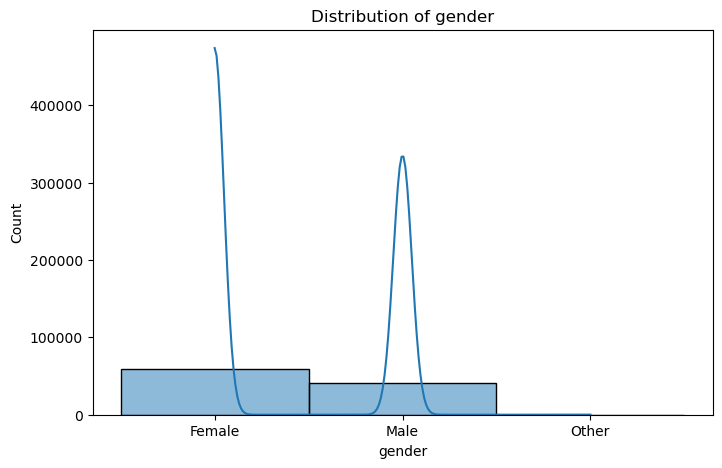

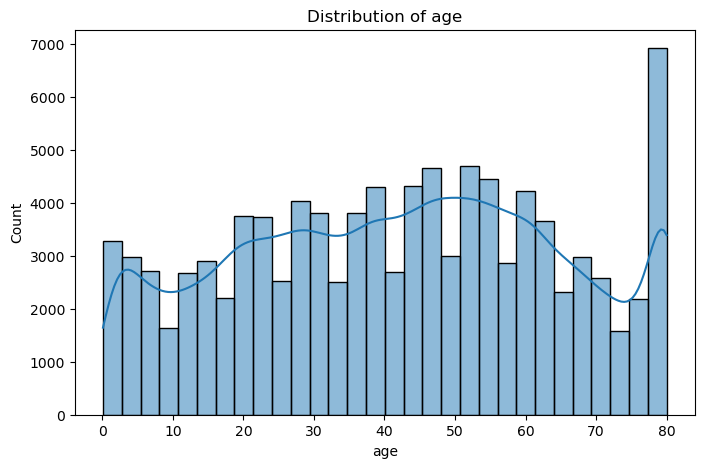

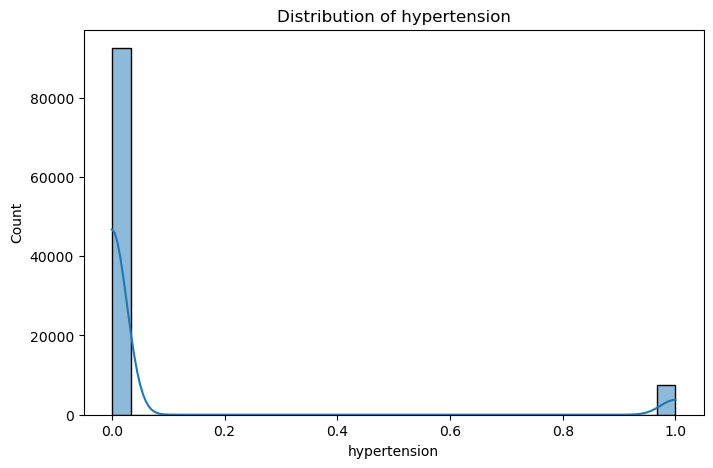

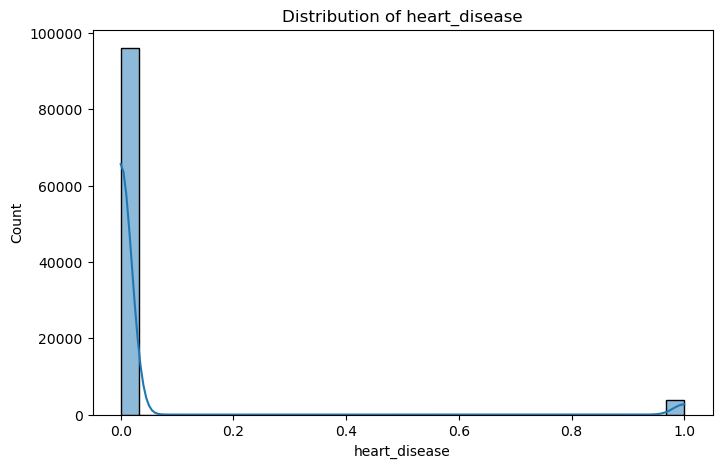

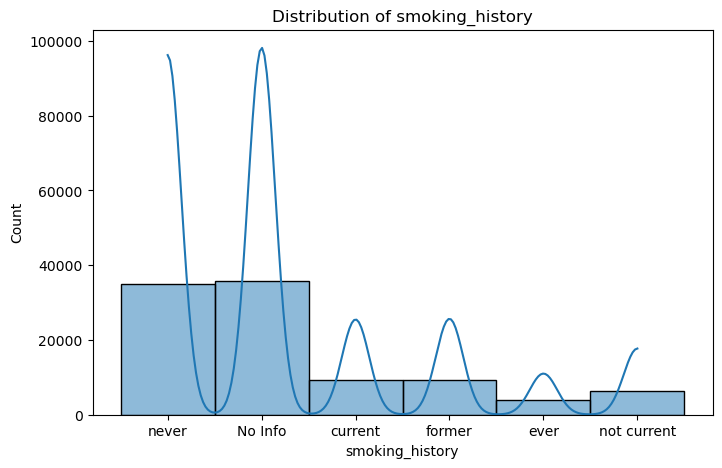

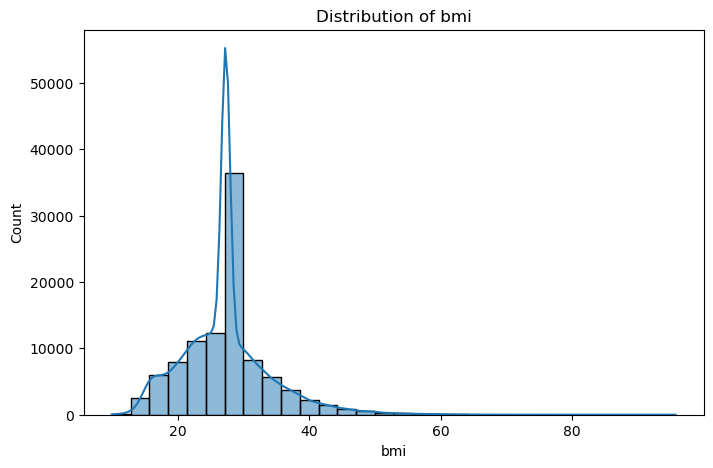

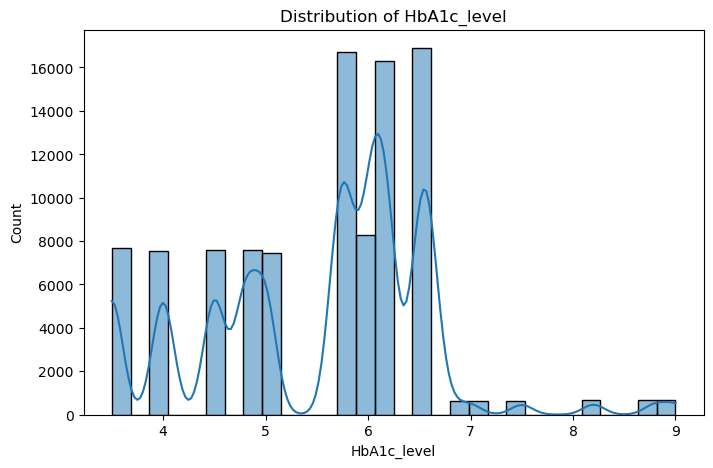

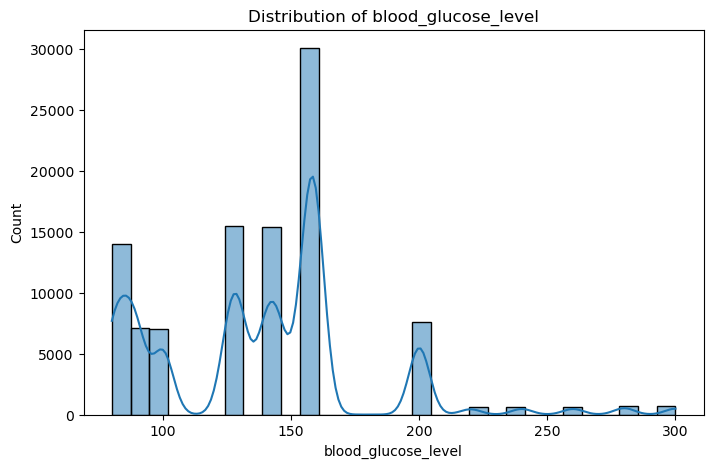

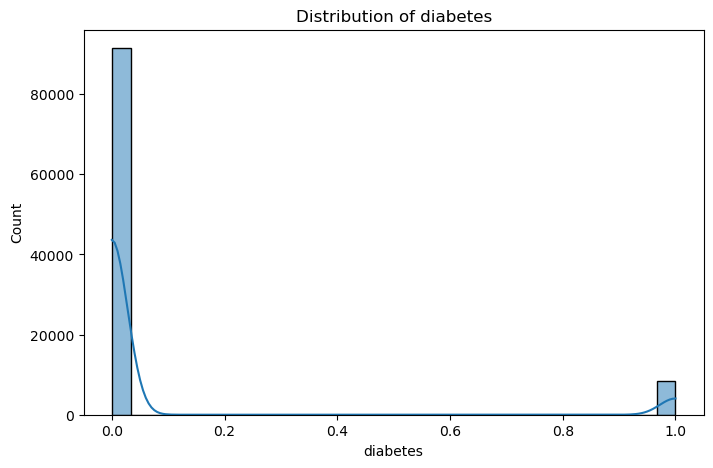

In [12]:
for column in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()


df['smoking_history_encoded'] = label_encoder.fit_transform(df['smoking_history'])


label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)


print(df[['smoking_history', 'smoking_history_encoded']])


Label Mapping: {'No Info': 0, 'current': 1, 'ever': 2, 'former': 3, 'never': 4, 'not current': 5}
      smoking_history  smoking_history_encoded
0               never                        4
1             No Info                        0
2               never                        4
3             current                        1
4             current                        1
...               ...                      ...
99995         No Info                        0
99996         No Info                        0
99997          former                        3
99998           never                        4
99999         current                        1

[100000 rows x 2 columns]


In [14]:
label_encoder = LabelEncoder()


df['gender_encoded'] = label_encoder.fit_transform(df['gender'])


label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)


print(df[['gender', 'gender_encoded']])

Label Mapping: {'Female': 0, 'Male': 1, 'Other': 2}
       gender  gender_encoded
0      Female               0
1      Female               0
2        Male               1
3      Female               0
4        Male               1
...       ...             ...
99995  Female               0
99996  Female               0
99997    Male               1
99998  Female               0
99999  Female               0

[100000 rows x 2 columns]


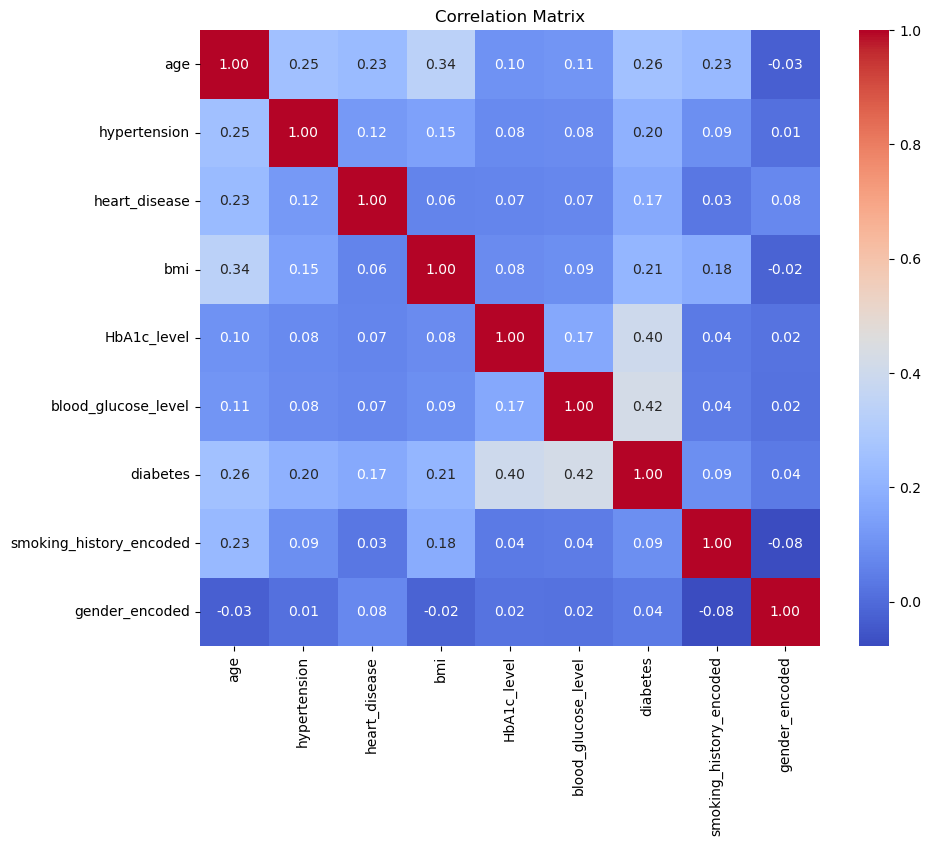

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [16]:
print(df['diabetes'])

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64


In [17]:
df['diabetes'].unique()

array([0, 1], dtype=int64)

In [18]:
columns_drop = ['gender', 'smoking_history']


df.drop(columns=columns_drop, inplace=True)

In [19]:
df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_encoded,gender_encoded
0,80.0,0,1,25.19,6.6,140,0,4,0
1,54.0,0,0,27.32,6.6,80,0,0,0
2,28.0,0,0,27.32,5.7,158,0,4,1
3,36.0,0,0,23.45,5.0,155,0,1,0
4,76.0,1,1,20.14,4.8,155,0,1,1
...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,0,0
99996,2.0,0,0,17.37,6.5,100,0,0,0
99997,66.0,0,0,27.83,5.7,155,0,3,1
99998,24.0,0,0,35.42,4.0,100,0,4,0


In [20]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# DecisionTreeClassifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier(random_state=42)
dtr.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
y_pred=dtr.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9525


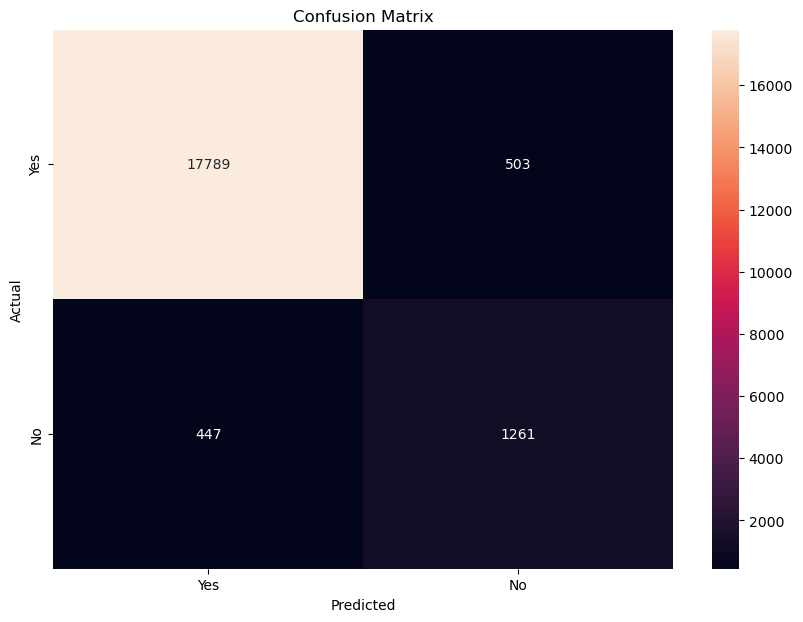

In [26]:
cm = confusion_matrix(y_test,y_pred)
# Plotting the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, 
            annot=True,
            fmt='d', 
            xticklabels=['Yes','No'],
            yticklabels=['Yes','No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
#Accuracy: The ratio of correct predictions to the total number of predictions= TP+TN/(TP + TN + FP + FN).
accuracy = accuracy_score(y_test, y_pred)

# precision =The ratio of true positive predictions to the total number of positive predictions =TP/(TP + FP)
precision = precision_score(y_test, y_pred)

#Recall(Sensitivity): The ratio of true positive predictions to the total number of actual positive instances recall= TP/(TP + FN) 
recall = recall_score(y_test, y_pred)

# The harmonic mean of precision and recall, which provides a balanced measure of the model’s performance.
f1 = f1_score(y_test,y_pred)
# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9525
Precision: 0.7148526077097506
Recall: 0.7382903981264637
F1 Score: 0.7263824884792627


# LogisticRegression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
a=lr.score(X_test,y_test)
print("Logistic Regression Accuracy: ", a)

Logistic Regression Accuracy:  0.95895


In [30]:
y_Pred2 = lr.predict(X_test)

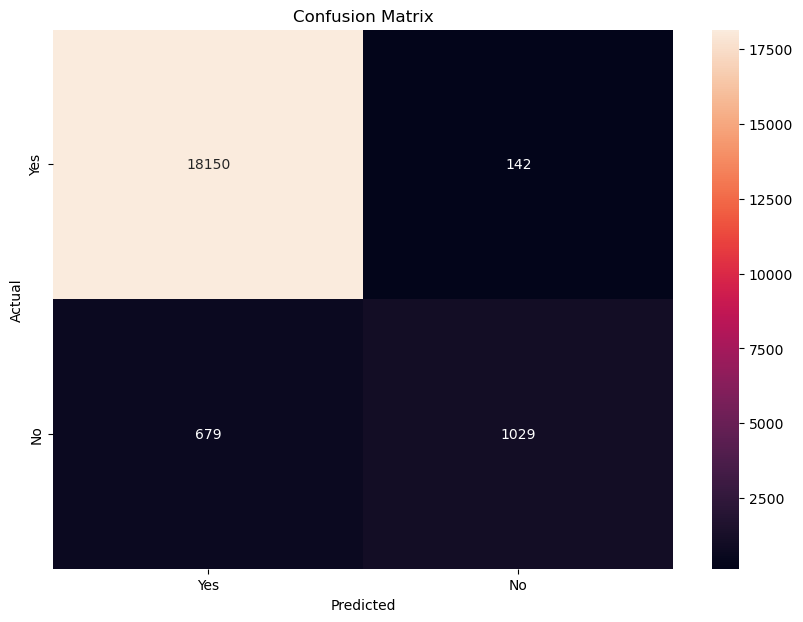

In [31]:
cm = confusion_matrix(y_test, y_Pred2)
# Plotting the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, 
            annot=True,
            fmt='d', 
            xticklabels=['Yes','No'],
            yticklabels=['Yes','No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
#Accuracy: The ratio of correct predictions to the total number of predictions= TP+TN/(TP + TN + FP + FN).
accuracy = accuracy_score(y_test, y_Pred2)

# precision =The ratio of true positive predictions to the total number of positive predictions =TP/(TP + FP)
precision = precision_score(y_test, y_Pred2)

#Recall(Sensitivity): The ratio of true positive predictions to the total number of actual positive instances recall= TP/(TP + FN) 
recall = recall_score(y_test, y_Pred2)

# The harmonic mean of precision and recall, which provides a balanced measure of the model’s performance.
f1 = f1_score(y_test, y_Pred2)
# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.95895
Precision: 0.8787361229718189
Recall: 0.6024590163934426
F1 Score: 0.7148315387287252


# RandomForest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.97015

In [34]:
y_Pred3 = rf.predict(X_test)

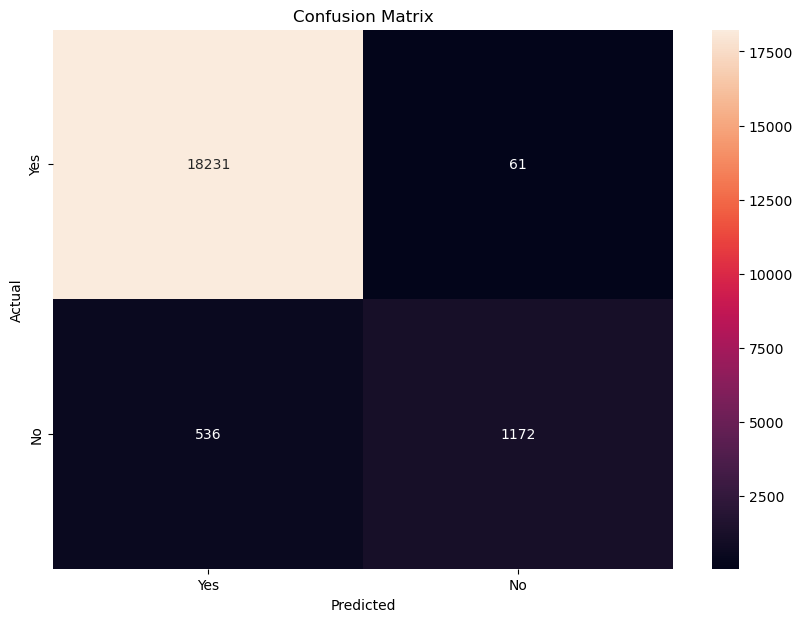

In [35]:
cm = confusion_matrix(y_test, y_Pred3)
# Plotting the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, 
            annot=True,
            fmt='d', 
            xticklabels=['Yes','No'],
            yticklabels=['Yes','No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
#Accuracy: The ratio of correct predictions to the total number of predictions= TP+TN/(TP + TN + FP + FN).
accuracy = accuracy_score(y_test, y_Pred3)

# precision =The ratio of true positive predictions to the total number of positive predictions =TP/(TP + FP)
precision = precision_score(y_test, y_Pred3)

#Recall(Sensitivity): The ratio of true positive predictions to the total number of actual positive instances recall= TP/(TP + FN) 
recall = recall_score(y_test, y_Pred3)

# The harmonic mean of precision and recall, which provides a balanced measure of the model’s performance.
f1 = f1_score(y_test, y_Pred3)
# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.97015
Precision: 0.9505271695052717
Recall: 0.6861826697892272
F1 Score: 0.797007820469228


# K-Fold Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score

In [48]:
score_rf = cross_val_score(RandomForestClassifier(n_estimators=10),X,y,cv=5)
#cv = 5 means we have 5 fold
print(score_rf)
print('Avg : ',np.average(score_rf))

[0.96935 0.97005 0.9678  0.9708  0.9699 ]
Avg :  0.96958


In [45]:
score_ds = cross_val_score(DecisionTreeClassifier(criterion="gini"),X,y,cv=5)
#cv = 5 means we have 5 fold
print(score_rf)
print('Avg : ',np.average(score_ds))

[0.96925 0.9704  0.9673  0.96935 0.96855]
Avg :  0.95124


In [46]:
score_lr = cross_val_score(LogisticRegression(solver='liblinear'),X,y,cv=5)
print(score_lr)
print('Avg : ',np.average(score_lr))

[0.9606  0.9606  0.96005 0.95965 0.9596 ]
Avg :  0.9601
